# Make Moons Classification problem

> This dataset is take from the sklearn.make_moons library.

* Link -> https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

### Exercise

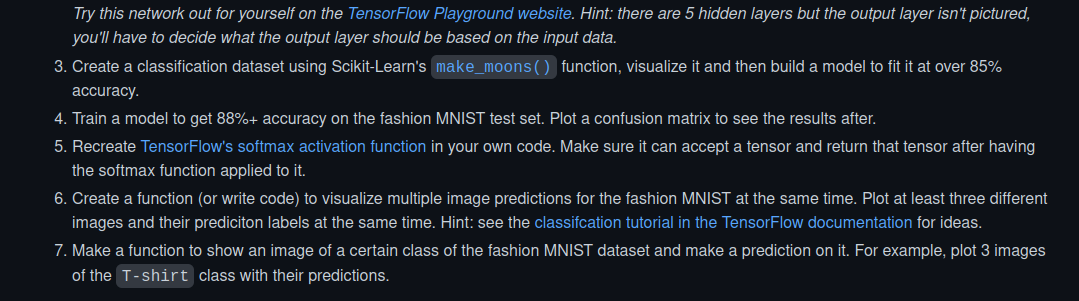


*Link* -> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-02-neural-network-classification-with-tensorflow-exercises

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons
X,y= make_moons(n_samples=10000, shuffle=True, noise=0.3, random_state=42)

In [6]:
X.shape, y.shape

((10000, 2), (10000,))

In [9]:
X[:5]

array([[ 0.77869199,  0.03970271],
       [-0.15171227, -0.26941422],
       [ 0.3125917 ,  0.6027169 ],
       [-0.61817507,  0.09464379],
       [-0.89836443,  0.48600448]])

In [11]:
y[:5]

array([1, 0, 0, 0, 0])

In [12]:
moons=pd.DataFrame({"X_0": X[:,0], "X_1": X[:,1], "label":y})
moons[:5]

,X_0,X_1,label
0,0.778692,0.039703,1
1,-0.151712,-0.269414,0
2,0.312592,0.602717,0
3,-0.618175,0.094644,0
4,-0.898364,0.486004,0


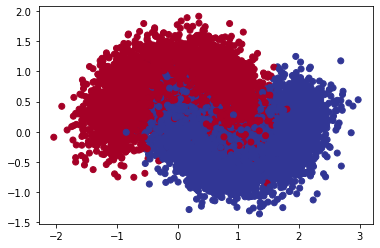

In [13]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((7000, 2), (3000, 2), (7000,), (3000,))

## Binary Class classification

In [18]:
moons= tf.keras.Sequential([
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid'),
])

moons.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_1= moons.fit(X_train,y_train, epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.8341
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8529
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8630
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8753
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2730 - accuracy: 0.8860
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8933
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8977
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.9016
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9041
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2288 - accura

In [19]:
moons.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [20]:
moons.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9157


[0.20605947077274323, 0.9156666398048401]

Text(0.5, 1.0, 'Moons Loss Curve')

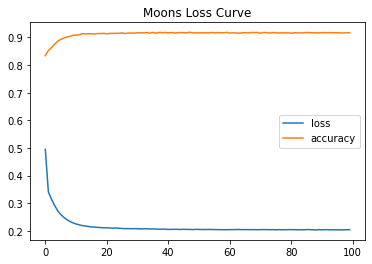

In [21]:
pd.DataFrame(history_1.history).plot()
plt.title("Moons Loss Curve")

### Finding ideal Learning rate

In [33]:
tf.random.set_seed(42)
moons_1= tf.keras.Sequential([
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid'),
])

moons_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

lr_callback=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_2= moons_1.fit(X_train,y_train, epochs=100, callbacks=[lr_callback])

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.7930 - accuracy: 0.4959 - lr: 1.0000e-04
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.7307 - accuracy: 0.4986 - lr: 1.1220e-04
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5130 - lr: 1.2589e-04
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.5493 - lr: 1.4125e-04
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5723 - accuracy: 0.6617 - lr: 1.5849e-04
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7997 - lr: 1.7783e-04
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8333 - lr: 1.9953e-04
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8463 - lr: 2.2387e-04
Epoch 9/100
219/219 [==============================] - 0

In [30]:
moons_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [31]:
moons_1.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 1.0932 - accuracy: 0.4870


[1.093232274055481, 0.4869999885559082]

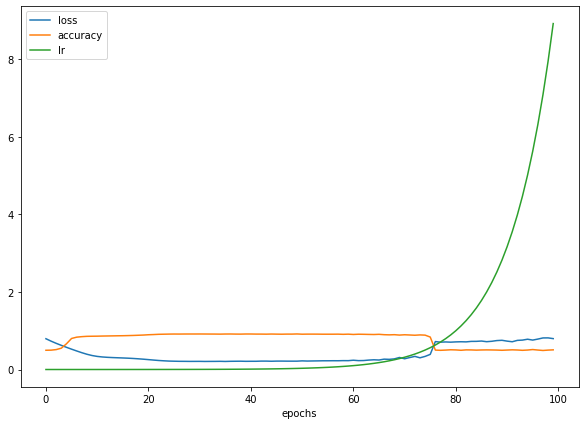

In [32]:
pd.DataFrame(history_2.history).plot(figsize=(10,7), xlabel="epochs")

In [34]:
lrs=  1e-4 *(10** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate VS Loss')

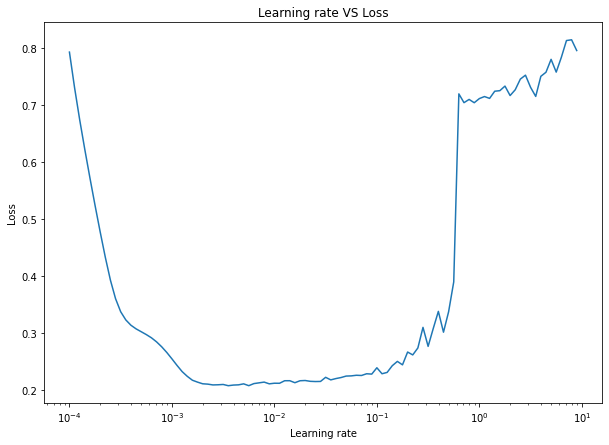

In [36]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate VS Loss")

In [38]:
tf.random.set_seed(42)
moons_2= tf.keras.Sequential([
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(10, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid'),
])

moons_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])

history_3= moons_2.fit(X_train,y_train, epochs=20)

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.3917 - accuracy: 0.8217
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2692 - accuracy: 0.8877
Epoch 3/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9064
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2156 - accuracy: 0.9121
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2141 - accuracy: 0.9123
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9136
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.2105 - accuracy: 0.9147
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.2093 - accuracy: 0.9126
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9140
Epoch 10/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2098 - accuracy: 0.9149

In [39]:
moons_2.evaluate(X_test,y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9167


[0.20805780589580536, 0.9166666865348816]

Text(0.5, 1.0, 'Moons Loss Curve')

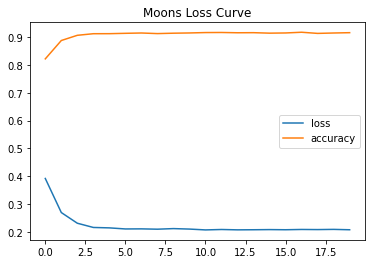

In [40]:
pd.DataFrame(history_3.history).plot()
plt.title("Moons Loss Curve")

### Conclusion

> I am getting more than 0.91 or 91.67% on the *moons_2* model.